# Storage and retrieval of superposition of OAM states

#### State

The state being stored is given by:

$$
|\psi\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle_{\ell}|1\rangle_{-\ell} + |1\rangle_{\ell}|0\rangle_{-\ell}\right) = \frac{1}{\sqrt{2}}\left(|1\rangle + |2\rangle\right)
$$

The corresponding density matrix is given by:

$$
\hat{\rho} = |\psi\rangle\langle\psi| = \frac{1}{2}|1\rangle\langle 1| + \frac{1}{2}|1\rangle\langle 2| + \frac{1}{2}|2\rangle\langle 1| + \frac{1}{2}|2\rangle\langle 2|
$$

#### Hamiltonian

The linearized Hamiltonian in the resolved sideband limit, $\kappa\ll\omega_c$, $\kappa\ll\omega_d$ (idealy, $\omega_{c(d)} \gt 10\kappa$) and under the assumption that, $\omega_c - \omega_d\gt 40$ is given by

$$
\frac{\hat{H}_{bare}}{\hbar} = -\sum_{i = 1}^{2}\hat{a}^\dagger_{i}\hat{a}_{i}\tilde{\Delta}_i + \omega_c\hat{c}^\dagger\hat{c} + \omega_d\hat{d}^\dagger\hat{d}
$$

$$
\frac{\hat{H}_{int}}{\hbar} = -\tilde{G}_1\left(\hat{a}_{1}^\dagger\hat{c} + \hat{a}_{1}\hat{c}^\dagger \right) - \tilde{G}_2\left(\hat{a}_{2}^\dagger\hat{d} + \hat{a}_{2}\hat{d}^\dagger \right)\quad\left(\tilde{G}_1 = G\alpha_1/\sqrt{2},\;\tilde{G}_2 = G\alpha_2/\sqrt{2}\right)
$$

$$
\frac{\hat{H}_{coll}}{\hbar} = 2g^\prime \left( \hat{c}^\dagger \hat{c} + \hat{d}^\dagger \hat{d} \right)
+ g^\prime \left( \hat{c} \hat{d} e^{-i(\delta_1 + \delta_2) t} + \hat{c}^\dagger \hat{d}^\dagger e^{i(\delta_1 + \delta_2) t} \right)\bigg]
$$

$$
\hat{H} = \hat{H}_{bare} + \hat{H}_{int} + \hat{H}_{coll}
$$

Here, $\hat{a}_1\equiv \hat{a}_{\ell}$, $\hat{a}_2\equiv \hat{a}_{-\ell}$, $\tilde{G}_1\equiv \tilde{G}_{\ell}$, $\tilde{G}_2\equiv \tilde{G}_{-\ell}$, and $g^\prime = 2\tilde{g}N$.


#### Import parameters

One dimensionality satisfied
RHS is greater then LHS by, 11.816 times
drive power =  8.584293215184512e-10
eta_l and eta_p :  450.0547675537846 4.500547675537846
omega_c =  172.268
omega_d =  126.564
omega_c-omega_d =  45.704
g_prime/gamma_0 =  0.053
number of thermal photons in atomic modes c and d:  2.963996425317431e-180 1.264118188079506e-132


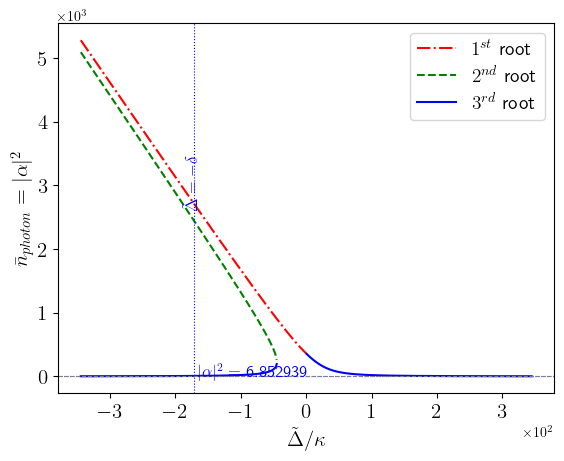

photon number at (delta_tilde = -small_delta) is 6.866789
Q_cs = -0.08776534651866302 and Q_ds = -0.1194450030196379
|alpha_s|^2 (photon number) =  6.853
G_tilde =  4.08
Criterion satisfied
ratio of RHS by LHS:  3.086464385691955
LHS 1898.0997665922864
K.E 5522.4173300773045
Coll 336.0000000000001
scattering rate less than 1
scattering rate 5.768559671149552e-06
Real part of the eigenvalues of the Jacobian matrix are: [-0.24721298 -0.24708444 -0.00562817 -0.2446426  -0.24980958 -0.00563889]
Eigen values with positive real part []
The system is stable.


In [1]:
%run ./bistability_plot.ipynb

#### Libraries

In [2]:
import numpy as np
from qutip import *

#### Parameters

In [3]:
# Define constants
g       = np.round(g_prime,3)

omega_c = np.round(omega_c, 3)
omega_d = np.round(omega_d, 3)

delta_1 = np.round(omega_c + 4*g_tilde*Na, 3)     # small delta = omega_p - omega_l 
delta_2 = np.round(omega_d + 4*g_tilde*Na, 3)

Delta_1 = -delta_1
Delta_2 = -delta_2
boost_coup_const = np.round(np.abs(G_tilde_val), 3)


#### All function definitions

In [4]:
def two_mode_superpostion_state(dim):
    """Generate a two-mode superposition state."""
    I = qeye(dim)

    # Define basis states in the dim dimensional space
    zero = fock(dim, 0)   # |0⟩ in dim dimensional Hilbert space
    one  = fock(dim, 1)   # |1⟩ in dim dimensional Hilbert space

    # Define the composite state in 6D Hilbert space
    psi = tensor(zero, one) + tensor(one, zero)

    # Normalize the state
    psi = psi.unit()

    return ket2dm(psi)    # ket2dm() function takes a state vector and calculates its density matrix

def thermal_state(n_th, dim):
    """Generate a thermal state with mean phonon number n_th."""
    return thermal_dm(dim, n_th)

# Time-dependent functions
def switch_function(t, t_start, t_off, off_duration, smoothness):
    """
    Defines a smooth function that switches on and off based on given parameters.

    arguments:
    t: Time at which the function is evaluated.
    t_on: The time at which the function switches on.
    t_off: The time at which the function switches off.
    offduration: The duration for which the function stays off.
    smoothness: Controls how smoothly the function switches off and on.

    Returns:
    The value of the function at time t.
    """
    def switching_on(t_on):
        return 0.5 * (1 + np.tanh(smoothness * (t - t_on)))
    
    def switching_off(t_off):
        return 0.5 * (1 - np.tanh(smoothness * (t - t_off)))

    return switching_on(t_start)*switching_off(t_off) + switching_on(t_off + off_duration)

def Gt(t, args):
    """ args is a dictionary containing a list of parameters
    """
    t_start = args['t_start']
    t_off   = args['t_off']
    off_duration = args['off_duration']
    smoothness   = args['smoothness']
    G0           = args['boost_coup_const']
    return G0*switch_function(t, t_start, t_off, off_duration, smoothness)

# Time-dependent coefficients
def f_20(t, args):
    delta_1 = args['delta_1']
    delta_2 = args['delta_2']
    return np.exp(-1j *2*(delta_1 + delta_2) * t)

def f_21(t, args):
    delta_1 = args['delta_1']
    delta_2 = args['delta_2']
    return np.exp(1j * 2* (delta_1 + delta_2) * t)


# Unitary transformation to get rid of any global phase after reading
def unitary_rotation_operator (theta_a, theta_b, dim):
    
    # Define creation and annihilation operators for each mode
    a = destroy(dim)  # Mode a
    b = destroy(dim)  # Mode b

    # Define number operators
    num_a = a.dag() * a
    num_b = b.dag() * b

    # Define the rotation operators
    U_a = (-1j * theta_a * num_a).expm()  # Rotation for mode a
    U_b = (-1j * theta_b * num_b).expm()  # Rotation for mode b

    # Define the total rotation operator (tensor product)
    U_total = tensor(U_a, U_b)

    return U_total

#### Define the Hilbert space and Hamiltonian

In [5]:
# Define annihilation operators for each mode
N1 = 2  # Truncation level for Fock space
N2 = 2

# Modes a1, a2, c, d
a1 = destroy(N1)
a2 = destroy(N1)
c  = destroy(N2)
d  = destroy(N2)

# Create the Hilbert space by tensoring the operators
a1_op = tensor(a1, qeye(N1), qeye(N2), qeye(N2))
a2_op = tensor(qeye(N1), a2, qeye(N2), qeye(N2))
c_op  = tensor(qeye(N1), qeye(N1), c, qeye(N2))
d_op  = tensor(qeye(N1), qeye(N1), qeye(N2), d)

# Number operators in composite space
n_a1_op = a1_op.dag() * a1_op
n_a2_op = a2_op.dag() * a2_op
n_c_op = c_op.dag() * c_op
n_d_op = d_op.dag() * d_op


# Define the Hamiltonian components
# Bare Hamiltonian
H_00 = -n_a1_op * Delta_1 - n_a2_op * Delta_2 + n_c_op * omega_c + n_d_op * omega_d

# beam splitter part
H_10 = (a1_op.dag() * c_op + a1_op * c_op.dag()) #- (a1_op.dag() * d_op + a1_op * d_op.dag())    # coment the second term when you use only the beam splitter Hamiltonian 
H_11 = (a2_op.dag() * d_op + a2_op * d_op.dag()) #- (a2_op.dag() * c_op + a2_op * c_op.dag())

# Collisional part
H_20   = g*c_op*d_op
H_21   = g*c_op.dag()*d_op.dag()
H_22   = 2 * g * (n_c_op + n_d_op)


# Full Hamiltonian
H = [H_00,                                     # here, [H_10, Gt] means H_10*Gt and [H_00, [H_10, Gt]] means H_00 + H_10*Gt.
    [H_10, Gt],[H_11, Gt],
    [H_20, f_20],[H_21, f_21],
    H_22,
]

#Beam splitter Hamiltonian
H = [
    [H_10, Gt],[H_11, Gt]
]


# Collapse operators
c_ops_list = [
    np.sqrt(kappa) * a1_op,                  # Optical loss mode 1
    np.sqrt(kappa) * a2_op,                  # Optical loss mode 2
    np.sqrt(gamma_m * (nth_c + 1)) * c_op,   # Mechanical damping (decay)
    np.sqrt(gamma_m * nth_c) * c_op.dag(),
    np.sqrt(gamma_m * (nth_d + 1)) * d_op,
    np.sqrt(gamma_m * nth_d) * d_op.dag()
]

#### Intialization

Define the density matrix of the composite system at time, $t = 0$

In [6]:
# Initial state
rho_opt_init  = two_mode_superpostion_state(N1)
rho_mech_init = tensor(thermal_state(nth_c, N2), thermal_state(nth_d, N2))
initial_state = tensor(rho_opt_init, rho_mech_init)


#### Generate data for plotting

In [7]:
# boost_coup_const = 4
period       = np.pi / (2 * boost_coup_const)

storage_time = 10*period

# Dictionary for storing options
options_dic = {"progress_bar": False, "nsteps":40e3}#"atol":1e-5, "rtol": 1e-4, }

# start time of the drive fields
t_start      = -100
    
# off time of the drive fields
t_off        = period

# Off duration of the drive fields
off_duration = storage_time

# On time of the drive fields
t_on         = t_off + off_duration

# smoothness of switching on and off of the drive fields
smoothness   = 100    # this parameter determins how smoothly the drive field is switched off and then back on, decreasing its value leads to increase in smoothness

# write and read times of the signals
t_write  = t_off
t_read   = t_on + period

# times related to the simulation
t_eval = np.array([0, t_read])
    

# Dictionary for storing arguments
args_dic = {'t_start': t_start,
        't_off': t_off,
        'off_duration': storage_time,
        'smoothness': smoothness,
        'boost_coup_const': boost_coup_const,
        'delta_1': delta_1,
        'delta_2': delta_2
        }
# solve using qutip.mesolve()
result = mesolve(H, initial_state, t_eval, c_ops = c_ops_list, e_ops= None, args = args_dic, options = options_dic)  # in "e_ops" ops stands for operators, "e" stands for expectation


# evaluate the retrieved density matrix
rho_opt_read  = result.states[1].ptrace([0,1])

# rotate the state
theta_a = -np.pi/2
theta_b = -np.pi/2

U_inverse     = unitary_rotation_operator(2*theta_a, 2*theta_b, N1).inv()   # take the inverse of the rotation matrix since we want to revert the phase change

rho_opt_prime = U_inverse*rho_opt_read*U_inverse.dag()       # or np.dot(U_total, psi_norm)



# Plots

#### Configure matplotlib

In [8]:
import matplotlib.pyplot as plt
import matplotlib as mpl

#enable TeX fonts
plt.rcParams['text.usetex'] = True

# Set the global font size for all legends
mpl.rcParams['legend.fontsize'] = 14

# Set the global font size for all axis labels
mpl.rcParams['axes.labelsize'] = 12

# Set the global font style for all axis labels
plt.rcParams['font.family'] = 'Times New Roman'

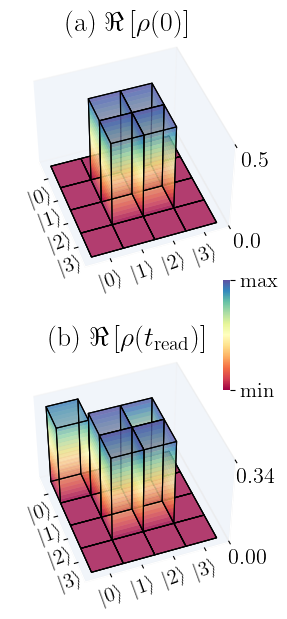

In [9]:
from matplotlib import cm, colors

%run ./density_matrix_plotter.ipynb

# Create figure
fig = plt.figure(figsize=(2.5, 6.5))

# Define the axes
axes = []  # List to store subplot axes
nrows = 2
ncols = 1
for i in range(1, nrows*ncols + 1):  # Indices from 1 to 12
    ax = fig.add_subplot(nrows, ncols, i, projection='3d')
    axes.append(ax)  # Store the axis in the list

# real part
plot_dm(axes[0], rho_opt_init, xslice = [0,4], yslice = [0,4], ticks_font_size = [15,15,16], plot_title = r'(a) $\Re\left[\rho(0)\right]$')
plot_dm(axes[1], rho_opt_prime, xslice = [0,4], yslice = [0,4], ticks_font_size = [15,15,16], plot_title = r'(b) $\Re\left[\rho(t\textsubscript{read})\right]$')

# Imaginary part
# plot_dm(axes[2], rho_opt_init, xslice = [0,4], yslice = [0,4], ticks_font_size = [9,9,10], plot_title = r'(c) $\Im\left[\rho(0)\right]$', real_part= False)
# plot_dm(axes[3], rho_opt_prime, xslice = [0,4], yslice = [0,4], ticks_font_size = [9,9,10], plot_title = r'(d) $\Im\left[\rho(t\textsubscript{read})\right]$', real_part=False)

# Customize the colorbar
#####################################################
# Color normalization and colorbar
vmin, vmax = 0, 1
norm = colors.Normalize(vmin=vmin, vmax=vmax)

# colorbar position on the entire plot
cbar_ax = fig.add_axes([0.85, 0.37, 0.03, 0.17]) # [left, bottom, width, height]

cbar = fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cm.Spectral), cax=cbar_ax)

# Custom tick locations and labels
tick_locs = [0, 1]
tick_labels = ['min', 'max']

# Apply custom ticks and labels
cbar.set_ticks(tick_locs)
cbar.set_ticklabels(tick_labels)

# Remove border
for spine in cbar.ax.spines.values():
    spine.set_visible(False)

# Change font size of tick labels
cbar.ax.tick_params(labelsize=15)

#######################################################
# Customize boundary of the whole plot
fig.subplots_adjust(left=0, right=0.95, top=0.97, bottom=0, wspace=0.35, hspace=0)

# Make figure background transparent
fig.patch.set_alpha(0.0)

# save the plot to a file
filename = "figure2ii.svg"
plt.savefig(filename, format='svg', dpi = 32, transparent=True) # eps doesn't allow transparency

# Show the plot
plt.show()